In [93]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.regularizers import l1_l2
from keras.layers import Dropout

In [94]:
# LOAD DATA
train_images = np.load("./data/train_images.npy")
test_images = np.load("./data/test_images.npy")
train_labels = pd.read_csv("./data/train_labels.csv")

# x_train
X_train = train_images / 255.0
X_test = test_images / 255.0

# y_train
num_classes = 10
y_train = keras.utils.to_categorical(train_labels['label'], num_classes)

In [95]:
# MODEL
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28)),
    keras.layers.Reshape((28, 28, 1)),

    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),  # dropout

    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),  # dropout

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),  # regularization
    keras.layers.Dropout(0.5),  # dropout

    keras.layers.Dense(num_classes, activation="softmax")
])


In [90]:
batch_size = 128
epochs = 100

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/100
352/352 [==============================] - 10s 28ms/step - loss: 1.1191 - accuracy: 0.5995 - val_loss: 0.7233 - val_accuracy: 0.7398
Epoch 2/100
352/352 [==============================] - 9s 24ms/step - loss: 0.7202 - accuracy: 0.7451 - val_loss: 0.6489 - val_accuracy: 0.7602
Epoch 3/100
352/352 [==============================] - 9s 24ms/step - loss: 0.6647 - accuracy: 0.7644 - val_loss: 0.6075 - val_accuracy: 0.7764
Epoch 4/100
352/352 [==============================] - 9s 24ms/step - loss: 0.6234 - accuracy: 0.7816 - val_loss: 0.5698 - val_accuracy: 0.7986
Epoch 5/100
352/352 [==============================] - 9s 24ms/step - loss: 0.5965 - accuracy: 0.7925 - val_loss: 0.5496 - val_accuracy: 0.8084
Epoch 6/100
352/352 [==============================] - 9s 25ms/step - loss: 0.5761 - accuracy: 0.8019 - val_loss: 0.5393 - val_accuracy: 0.8130
Epoch 7/100
352/352 [==============================] - 10s 28ms/step - loss: 0.5560 - accuracy: 0.8083 - val_loss: 0.5212 - val_accurac

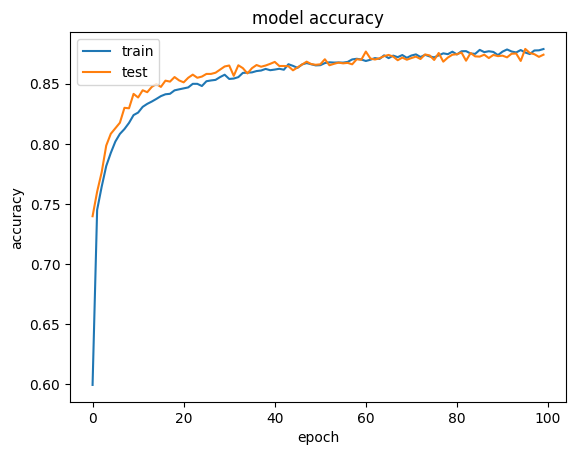

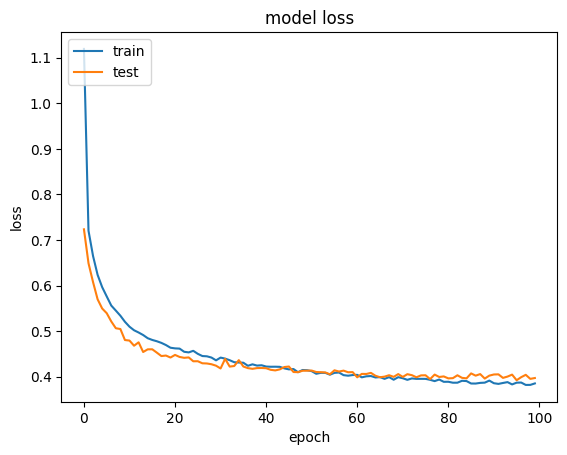

In [91]:
# SUMMARY

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [92]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# convert to CSV
submission = pd.DataFrame(columns=['ID', 'label'])
submission['ID'] = range(len(predicted_labels))
submission['label'] = predicted_labels
submission.to_csv('jxm_submission.csv', index=False)

625/625 [==============================] - 2s 3ms/step
